# Welcome to Interactive Javascript via Jupyter Notebooks

This environment gives us the ability to mix code and docuementation and isgreate for exploratory work, developing scripts or in place of a REPL.

Notebooks can be setup to use kernels in many differnt languages. Here we are using `ijavascript` which is a node based kernel. It's dependent on your node version so hopefully you are running (and installed `ijavascript`) on node v8.5.0 or greater.

# Tour

First thing to do is take a tour of teh jupyter environement, checkout the menu system and toolbar ^^^

In any code cell in the notebook we can execute javascript. Use the `run` control on the toolbar to execute a cell, or the various run commans in teh `Cell` menu. Click on the call below and run it! modify the code and run is again. 

You can spread calculations over multiple cells and scope behaves as though the notebook is a single script. Note this includes hoisting! so be careful with the sequence you layout your code to avoid confusion.

In [6]:
var msg = ["Hello", "World"].join(' ')
console.log(msg)

Hello World


However, the version of node we are running on has [99% ES2015 support](http://node.green/#ES2015) and the notebook supports is quite well (see the issues and caveats though)

In [7]:
console.log(["Hello", "World"].reduce((str, word) => `${str} ${word}`, ""))


 Hello World


There is also some [ES2017 support](http://node.green/#ES2017) in node v8.5, so async / await is also available but remember `await` can only be called within an async function, meaning you'll still need to deal with a promise at the base level.

In [11]:
async function helloWorld() {
    return "Hello World"
}

async function printIt() {
    return await helloWorld();       
}

printIt().then(console.log)

Promise { <pending> }

Hello World


## Graphics

Write objects to teh page by assigning to a set of global variables the kernel provides:

 - `$$html$$`
 - `$svg$$`
 - `$$png$$`
 - `$$jpeg$$`
 - `$$mime$$` => display anything that the underlying ipython knows the mime type for
 
 [the docs are here](http://n-riesco.github.io/ijavascript/doc/graphics.ipynb.html)
 
 Essentially this limits us to rendering 1 item per cell

In [6]:
$$html$$ = '<div style="font-weight: 800;">HELLO WORLD</div>'
$$html$$ = '<iframe src="https://giphy.com/embed/I5xVnGJRHZZf2" width="480" height="433" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/police-francisco-among-I5xVnGJRHZZf2">via GIPHY</a></p>'

HELLO WORLD

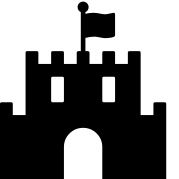

In [9]:
$$svg$$ = '<svg width="179" height="179" viewBox="0 0 1792 1792" xmlns="http://www.w3.org/2000/svg"><path d="M640 1008v-224q0-16-16-16h-96q-16 0-16 16v224q0 16 16 16h96q16 0 16-16zm512 0v-224q0-16-16-16h-96q-16 0-16 16v224q0 16 16 16h96q16 0 16-16zm512 32v752h-640v-320q0-80-56-136t-136-56-136 56-56 136v320h-640v-752q0-16 16-16h96q16 0 16 16v112h128v-624q0-16 16-16h96q16 0 16 16v112h128v-112q0-16 16-16h96q16 0 16 16v112h128v-112q0-6 2.5-9.5t8.5-5 9.5-2 11.5 0 9 .5v-391q-32-15-32-50 0-23 16.5-39t38.5-16 38.5 16 16.5 39q0 35-32 50v17q45-10 83-10 21 0 59.5 7.5t54.5 7.5q17 0 47-7.5t37-7.5q16 0 16 16v210q0 15-35 21.5t-62 6.5q-18 0-54.5-7.5t-55.5-7.5q-40 0-90 12v133q1 0 9-.5t11.5 0 9.5 2 8.5 5 2.5 9.5v112h128v-112q0-16 16-16h96q16 0 16 16v112h128v-112q0-16 16-16h96q16 0 16 16v624h128v-112q0-16 16-16h96q16 0 16 16z"/></svg>'

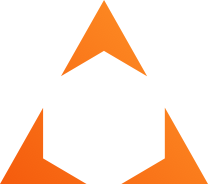

In [12]:
import fs from "fs";
$$png$$ = fs.readFileSync("expero.png").toString("base64")

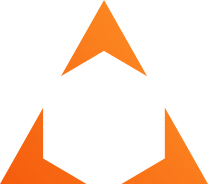

In [14]:
import fs from "fs";
$$jpeg$$ = fs.readFileSync("expero.jpg").toString("base64")

In [7]:
$$mime$$ = {"text/html": "<div style='background-color:olive;width:50px;height:50px'></div>"};

- import statements are scoped to the cell
- var x = require('x') follow var scoping rules across the notebook

In [9]:
import Plot from 'plotly-notebook-js';

var myPlot = Plot.createPlot([{ x: [1,2,3], y: [3,4,5] }], { title: 'Plotly in Jupyter!' });

$$html$$ = myPlot.render();




## Caveats & Issues

`const` & `let` don't play well when executing cells multiple times, we get already defined errors until notebook is restarted. a bug :( we need to stick to `var`. try in the following cell, the only way to un mulitple times is to use `var`

In [2]:
const doesntPlay = 0;
let doesntPlayEither = 0;

SyntaxError: Identifier 'doesntPlay' has already been declared